코랩 런타임 > 런타임 유형 변경 GPU 로 설정 후 과제 진행해주세요 !

# < 4주차 과제 >
- 원하는 구조를 가진 CNN을 구축할 수 있다
- 실전적인 이미지 데이터셋을 활용하여 분류 Task를 수행해보자.

In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Baseline (복습)

In [2]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 114642913.75it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33884110.16it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34307399.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10961178.81it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320, 10) ### : 알맞는 input은?

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [4]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [5]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [6]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-3-ce771b9addde>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307993
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.282830
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.274767
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.246955
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.240259
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.189916
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.165573
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.127945
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.045934
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.018842
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.868750
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.599404
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.316001
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.048567
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.841953
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.745679
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.674005
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.719600
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.589871
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.518528
Train Epoch: 1 [12800/60000 (

<ipython-input-6-6ed0d2a1801a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1838, Accuracy: 9469/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.212130
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.173862
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.181035
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.136105
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.123851
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.252305
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.127188
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.170403
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.074982
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.209870
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.079793
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.218421
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.153352
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.211391
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.577098
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.181344
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.112768
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.090017
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.343335
Train Epoch: 2 [12

# [4주차 과제 1 : CNN structure 구현하기]
- 3주차 과제에서 맛보았던 baseline 코드를 바탕으로,
- 첨부한 이미지의 structure를 구현해주세요!

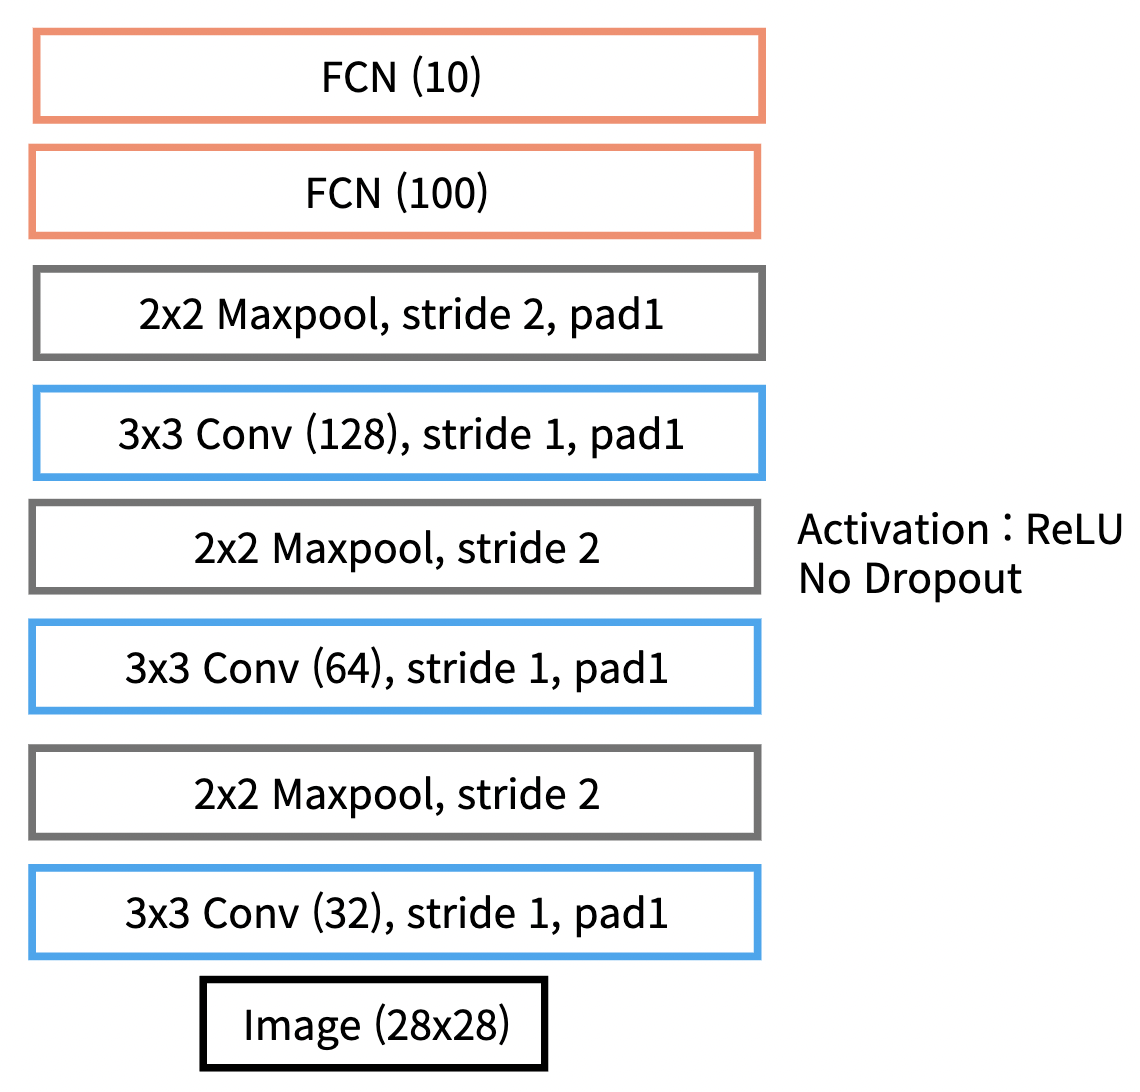

In [7]:
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.mp1 = nn.MaxPool2d(2, stride=2)
    self.mp2 = nn.MaxPool2d(2, stride=2, padding=1)
    self.fc1 = nn.Linear(2048, 100)
    self.fc2 = nn.Linear(100, 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp1(self.conv1(x))) # activation function <-> max-pooling 순서에 관계없이 값은 동일하지만(b.c. relu가 인풋사이즈를 바꾸지 않기 때문에)
    x = F.relu(self.mp1(self.conv2(x))) # 그러나 maxpooling 먼저 해야 속도가 빠름
    x = F.relu(self.mp2(self.conv3(x))) # fc layer는 linear 아닌가? fc layer에도 relu 적용하는 이유? 혹은 안하는 이유(찾아보니까 할 수 있다고 하는데 저번 과제에는 안 썼음)
    x = x.view(in_size, -1)
    x = self.fc1(x) # 여기에 relu 씌우면?
    x = self.fc2(x)
    return F.log_softmax(x)

In [8]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-22-a3a081502864>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.288161
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.308457
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.306425
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.291139
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.296948
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.300754
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.293788
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.302897
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.287884
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.291011
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.284716
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.278862
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.268168
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.277574
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.257078
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.252677
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.262169
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.247501
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.226983
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.241999
Train Epoch: 1 [12800/60000 (

<ipython-input-23-252edfe1b05a>:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 0.2042, Accuracy: 9336/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.171127
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.158351
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.319482
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.182344
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.176715
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.215358
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.113623
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.198053
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.256635
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.102001
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.099750
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.259706
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.157937
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.147008
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.214941
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.273813
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.160188
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.199475
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.152070
Train Epoch: 2 [12

# [4주차 과제 2 : CNN 활용하기]
- CIFAR 10 데이터셋을 사용하여,
- CNN을 직접 구현하며, 분류 task를 수행해봅시다.

* 지난번 과제와 마찬가지로 다양한 방식을 시도해보시고 그 시도 기록을 남겨주세요. 가장 성능이 좋았던 모델도 표시해주세요

* 이번엔 GPU resource 문제가 생길 수 있습니다. 파라미터 조정, dropout 추가, layer 수 조정 등 연산 효율성도 고려해서 베이스라인 조정해보세요

In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#랜덤 시드 고정 : 학습을 위한 실험을 할 때 무작위성을 컨트롤하기 위해 사용.
torch.manual_seed(777) #cpu 연산 고정

if device == "cuda:0":
    torch.cuda.manual_seed_all(777) # 멀티 gpu 연산 무작위 고정

import time
import copy

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Data Augmentation, Transform의 기능은?
transform = transforms.Compose([
                                transforms.Resize(256), #이미지 크기를 256*256으로
                                transforms.RandomCrop(227), #227 * 227로 자름
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #(mean, std, inplace=False)
])

## Composes several transforms together. This transform does not support torchscript
## mean : (sequence)형식으로 평균을 입력하며, 괄호 안에 들어가 있는 수의 개수가 채널의 수이다. - std : (sequence)형식으로 표준을 입력하며, 마찬가지로 괄호 안에 들어가 있는 수의 개수가 채널의 수

In [5]:
batch_size = 64 #batch_size는 원하는 크기로 변경 가능.

cifar_train = datasets.CIFAR10('~/.data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)

cifar_test = datasets.CIFAR10('~/.data', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

data_loaders = {'train' : train_loader, 'val': test_loader}
total_batch = {'train' : len(train_loader), 'val': len(test_loader)}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 29516252.57it/s]


Extracting /root/.data/cifar-10-python.tar.gz to /root/.data
Files already downloaded and verified


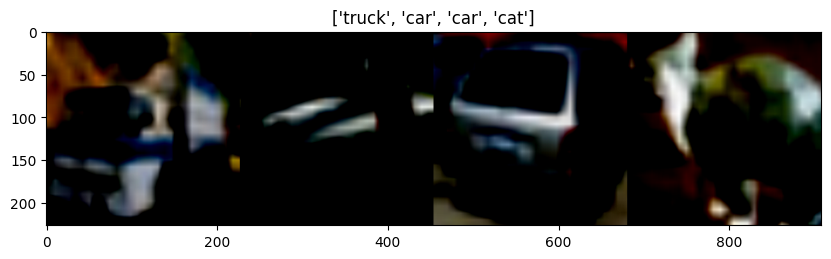

In [6]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

dataiter       = iter(train_loader)   # iter함수로 iteration 객체 가져오기
images, labels = next(dataiter)   # next함수로 다음 배치 1개 갖고오기

img   = utils.make_grid(images[:4], padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.title([classes[label] for label in labels[:4].tolist()])
plt.show()

런타임이 너무 오래 걸려서 한번밖에 못 돌렸습니다ㅠㅠ

In [7]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, kernel_size = 3)
    self.mp = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(6, 12, 5)
    self.conv3 = nn.Conv2d(12, 15, 5)
    self.fc = nn.Linear(9375 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = F.relu(self.mp(self.conv3(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [8]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [9]:
for epoch in range(1, 10):
    train(epoch)
    test()

Train Epoch: 3 [14720/50000 (29%)]	Loss: 1.129112
Train Epoch: 3 [15360/50000 (31%)]	Loss: 1.524638
Train Epoch: 3 [16000/50000 (32%)]	Loss: 1.296145
Train Epoch: 3 [16640/50000 (33%)]	Loss: 1.553740
Train Epoch: 3 [17280/50000 (35%)]	Loss: 1.550654
Train Epoch: 3 [17920/50000 (36%)]	Loss: 1.374924
Train Epoch: 3 [18560/50000 (37%)]	Loss: 1.578818
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.458807
Train Epoch: 3 [19840/50000 (40%)]	Loss: 1.459010
Train Epoch: 3 [20480/50000 (41%)]	Loss: 1.204577
Train Epoch: 3 [21120/50000 (42%)]	Loss: 1.429351
Train Epoch: 3 [21760/50000 (43%)]	Loss: 1.569545
Train Epoch: 3 [22400/50000 (45%)]	Loss: 1.520097
Train Epoch: 3 [23040/50000 (46%)]	Loss: 1.294258
Train Epoch: 3 [23680/50000 (47%)]	Loss: 1.439566
Train Epoch: 3 [24320/50000 (49%)]	Loss: 1.450287
Train Epoch: 3 [24960/50000 (50%)]	Loss: 1.221410
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.351960
Train Epoch: 3 [26240/50000 (52%)]	Loss: 1.571264
Train Epoch: 3 [26880/50000 (54%)]	Loss: 1.270773


<ipython-input-7-1c0fb7ba6075>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/50000 (0%)]	Loss: 1.158799
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.341079
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.027660
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.071388
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.153287
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.082527
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.174959
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.252607
Train Epoch: 1 [5120/50000 (10%)]	Loss: 0.869546
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.121551
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.176185
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.050189
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.195232
